## Logistic Regreson weather Australia.

### Teorie

Logistic Regresion it is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Logistic Regression algorithm helps us to classify observations into two or more discrete classes. So, the target variable is discrete in nature

Instead, of fitting a line to the data, logistic regression fits an "S" shaped "logistic function"
In our example we have obese and not obese, if our model predict that the chances are more than 50% to be obese we will clasiffy that al Obese.

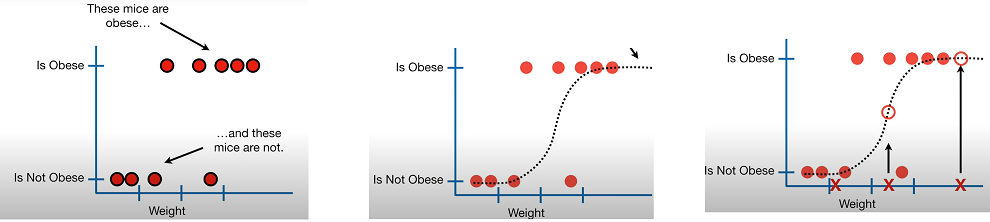

Like in Linear Regression we can make simple mondels: like predict obese or not obese base just on weight, or complex models base on more variables.

      - Obesity predicted by "Weight" + "Genotype"
      - Obesity predicted by "Weight" + "Genotype" + "Age"
      - Obesity predicted by "Weight" + "Genotype" + "Astrological Sign"

Logistic regression can work with continuous data(like **weight and age**) and discrete data (like genotype and **astrological signt**)  
 The "Wald's Test" will indicate whether a variable is relevant. 

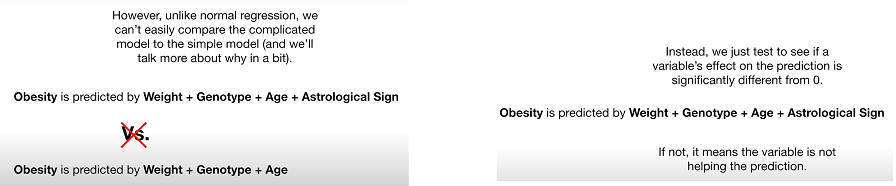

In logistic regresion we use **R2** to compare models, but in Logistic regression we use **"Maximum likehood"**

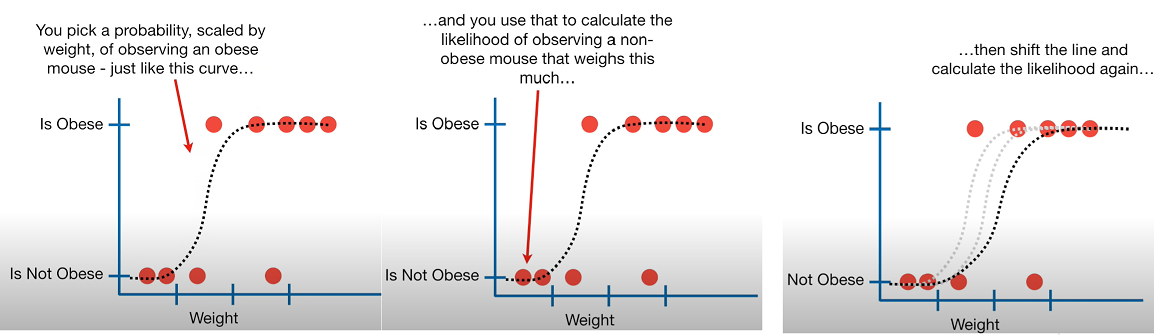

Finally, the curve with the maximum likelihood is selected.

## Learn by doing

Logistic Regression classifier to predict whether or not it will rain tomorrow in Australia.


That is the schema I m going to follow:

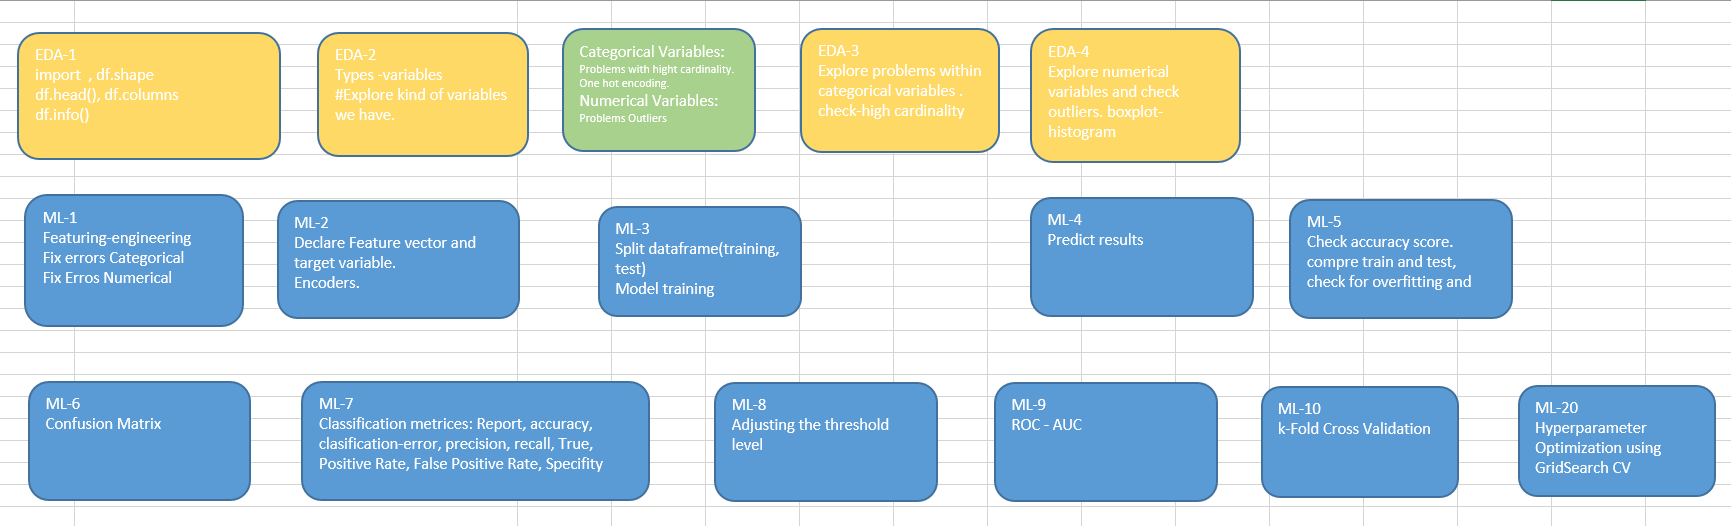

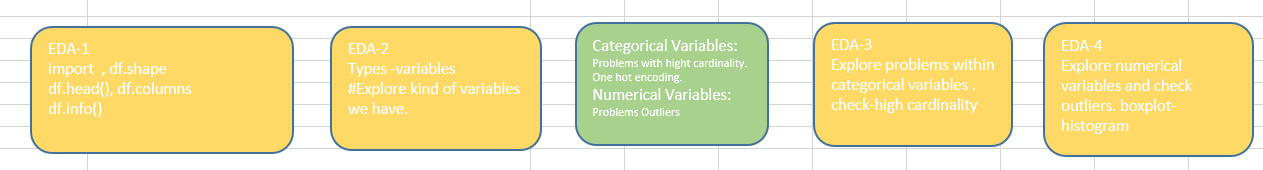

Once I clean my dataset I will save the data as "weatherAus_curate.csv", so next time I dont have to do all the steps again

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

# becaue I m getting the data from my laptop
data_path = str(os.environ.get("data"))
data = data_path + '//02_ML//weatherAUS.csv'

df = pd.read_csv(data)

### EDA

Every machine learning process has to start with EDA

In [2]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.shape

(142193, 24)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In order to no affect the results we have to remove RISK-MM, we will add it later in another test to see it it its significative

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Explore variables

#### Types of variables 
There are a mixture of categorical and numerical variables in the dataset.
Categorical variables have data type object. Numerical variables have data type float64.   

    'b'       boolean
    'i'       (signed) integer
    'u'       unsigned integer
    'f'       floating-point
    'c'       complex-floating point
    'O'       (Python) objects
    'S', 'a'  (byte-)string
    'U'       Unicode
    'V'       raw data (void)


In [7]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [8]:
numerical = set(df.columns.values) - set(categorical)
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df[numerical].head()

There are 16 numerical variables

The numerical variables are : {'Humidity3pm', 'Pressure9am', 'MaxTemp', 'WindSpeed9am', 'MinTemp', 'WindSpeed3pm', 'Cloud9am', 'Rainfall', 'Temp9am', 'Humidity9am', 'Temp3pm', 'Pressure3pm', 'Evaporation', 'WindGustSpeed', 'Sunshine', 'Cloud3pm'}


,Humidity3pm,Pressure9am,MaxTemp,WindSpeed9am,MinTemp,WindSpeed3pm,Cloud9am,Rainfall,Temp9am,Humidity9am,Temp3pm,Pressure3pm,Evaporation,WindGustSpeed,Sunshine,Cloud3pm
0,22.0,1007.7,22.9,20.0,13.4,24.0,8.0,0.6,16.9,71.0,21.8,1007.1,NaN,44.0,NaN,NaN
1,25.0,1010.6,25.1,4.0,7.4,22.0,NaN,0.0,17.2,44.0,24.3,1007.8,NaN,44.0,NaN,NaN
2,30.0,1007.6,25.7,19.0,12.9,26.0,NaN,0.0,21.0,38.0,23.2,1008.7,NaN,46.0,NaN,2.0
3,16.0,1017.6,28.0,11.0,9.2,9.0,NaN,0.0,18.1,45.0,26.5,1012.8,NaN,24.0,NaN,NaN
4,33.0,1010.8,32.3,7.0,17.5,20.0,7.0,1.0,17.8,82.0,29.7,1006.0,NaN,41.0,NaN,8.0


#### Explore problems with categorical variables, (high cardinality)

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model.

Problems of high cardinality? for example when we try the One-Hot encoding, in order convert categorical data into numerical, if our cardinality its too big will incur in "Curse of dimensionality" https://en.wikipedia.org/wiki/Curse_of_dimensionality

In [9]:
for var in categorical:   
    print(var.ljust(12, ' ') +  ' contains '.rjust(10, ' '),\
          str(len(df[var].unique())).rjust(5, ' '), ' labels')

Date         contains   3436  labels
Location     contains     49  labels
WindGustDir  contains     17  labels
WindDir9am   contains     17  labels
WindDir3pm   contains     17  labels
RainToday    contains      3  labels
RainTomorrow contains      2  labels


the attribute "Date" has a high cardinality but we will fix it later subdividing day-month-year

#### Explore problems with numerical variables, (outliers, null values)

In [10]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Humidity3pm       3610
Pressure9am      14014
MaxTemp            322
WindSpeed9am      1348
MinTemp            637
WindSpeed3pm      2630
Cloud9am         53657
Rainfall          1406
Temp9am            904
Humidity9am       1774
Temp3pm           2726
Pressure3pm      13981
Evaporation      60843
WindGustSpeed     9270
Sunshine         67816
Cloud3pm         57094
dtype: int64

#### Outliers

we have to be very carefull with outliers, not all outliers are wrong, sometimes just show us a special event.

*Usually, it is a mistake to remove an 'outlier' from a dataset unless you can establish that the observation in question arose from a documentable error (equipment failure, data entry error, etc.) or you know for sure that its value is impossible (person's age above 140, negative height, etc.)*

In [11]:
# Outliers in numerical variables

# view summary statistics in numerical variables

print(round(df[numerical].describe()), 2)


       Humidity3pm  Pressure9am   MaxTemp  WindSpeed9am   MinTemp  \
count     138583.0     128179.0  141871.0      140845.0  141556.0   
mean          51.0       1018.0      23.0          14.0      12.0   
std           21.0          7.0       7.0           9.0       6.0   
min            0.0        980.0      -5.0           0.0      -8.0   
25%           37.0       1013.0      18.0           7.0       8.0   
50%           52.0       1018.0      23.0          13.0      12.0   
75%           66.0       1022.0      28.0          19.0      17.0   
max          100.0       1041.0      48.0         130.0      34.0   

       WindSpeed3pm  Cloud9am  Rainfall   Temp9am  Humidity9am   Temp3pm  \
count      139563.0   88536.0  140787.0  141289.0     140419.0  139467.0   
mean           19.0       4.0       2.0      17.0         69.0      22.0   
std             9.0       3.0       8.0       6.0         19.0       7.0   
min             0.0       0.0       0.0      -7.0          0.0      -5.0  

We can appreciate that some of them `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` present outlieers

In [12]:
outliers = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm' ]

we will draw boxplots to visualise outliers 

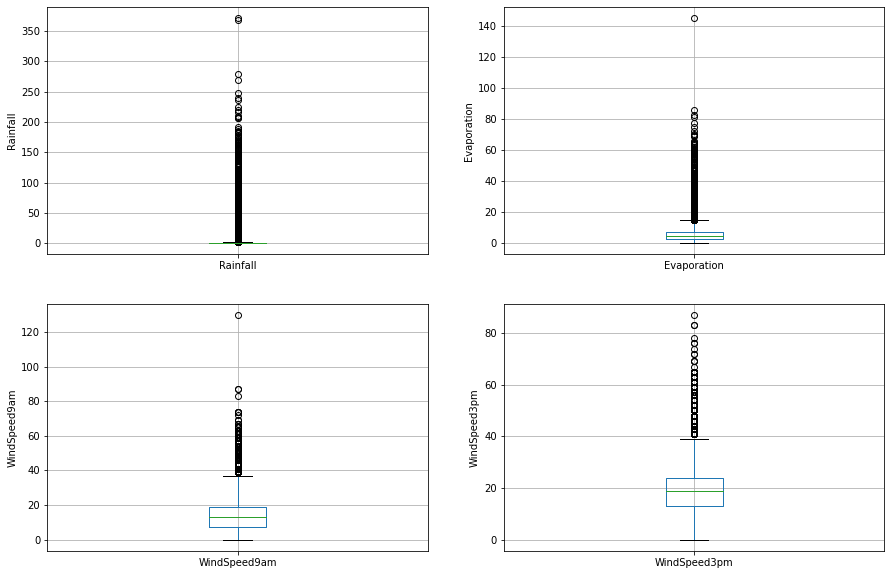

In [13]:
plt.figure(figsize=(15,10))
position = 0
for attribute_outlier in outliers:
    position += 1
    plt.subplot(2, 2, position)
    fig = df.boxplot(column=attribute_outlier)
    fig.set_title('')
    fig.set_ylabel(attribute_outlier)

We can confirm that there are a lot of outliers in these variables

#### Check distribution of variables
If the variable follows normal distribution, then I will do `Extreme Value Analysis`  

If they are skewed, we will proceed for the IQR 

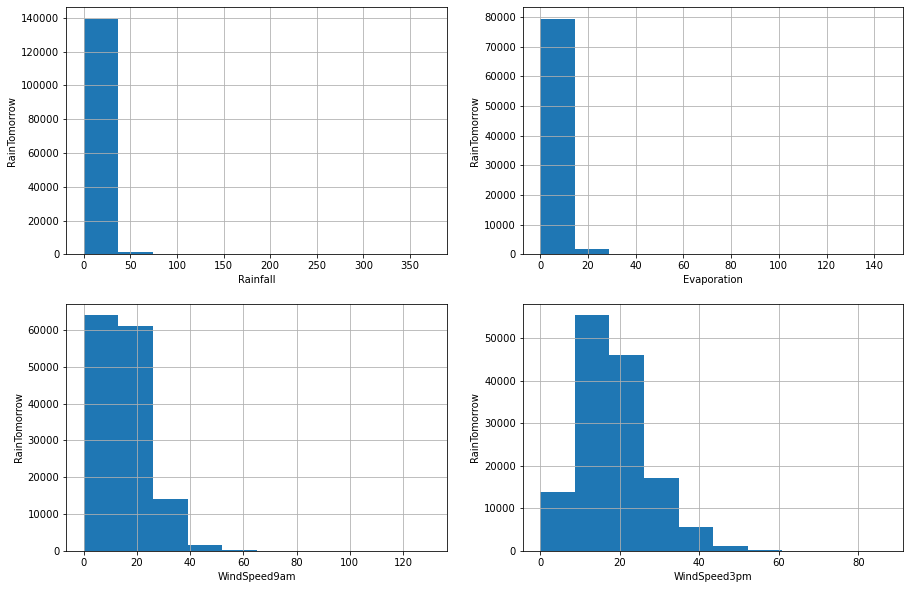

In [14]:
plt.figure(figsize=(15, 10))
position = 0
for attribute_outlier in outliers:
    position += 1
    plt.subplot(2, 2, position)
    fig = df[attribute_outlier].hist(bins=10)
    fig.set_xlabel(attribute_outlier)
    fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed*. So, I will use interquantile range to find outliers.  

skewed: A data is called as skewed when curve appears distorted to the left or to the right.

In [15]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [16]:
dic_values_outlieras = {}
dic_values_outlieras["pepe"] = 2

In [17]:
dic_values_outlieras = {}
for attribute_outlier in outliers:
    IQR = df[attribute_outlier].quantile(0.75) - df[attribute_outlier].quantile(0.25)
    value_dic_lower = "Lower_fence_" + attribute_outlier
    value_dic_upper = "Upper_fence_" + attribute_outlier
    dic_values_outlieras[value_dic_lower] = df[attribute_outlier].quantile(0.25) - (IQR * 3)
    dic_values_outlieras[value_dic_upper] = df[attribute_outlier].quantile(0.75) + (IQR * 3)
    print('{attribute} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(attribute=attribute_outlier, lowerboundary=dic_values_outlieras[value_dic_lower]\
                  , upperboundary=dic_values_outlieras[value_dic_upper]))
    

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [18]:
# ToDO create a function that find if the Lower_fende or Upper_fence below to outliers
for attribute_outlier in outliers:
    print(f'For {attribute_outlier}, the minimum is {df[attribute_outlier].min()} and the maximum is {df[attribute_outlier].max()}.So the outlieras are values > {dic_values_outlieras["Upper_fence_" + attribute_outlier]}')

#For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

For Rainfall, the minimum is 0.0 and the maximum is 371.0.So the outlieras are values > 3.2
For Evaporation, the minimum is 0.0 and the maximum is 145.0.So the outlieras are values > 21.800000000000004
For WindSpeed9am, the minimum is 0.0 and the maximum is 130.0.So the outlieras are values > 55.0
For WindSpeed3pm, the minimum is 0.0 and the maximum is 87.0.So the outlieras are values > 57.0


### ML-1 Feature Engineering

Its time to fix the error sin numerical and Categorical variables.
Fix problem with null values.

In [19]:
df[numerical].isnull().sum()

Humidity3pm       3610
Pressure9am      14014
MaxTemp            322
WindSpeed9am      1348
MinTemp            637
WindSpeed3pm      2630
Cloud9am         53657
Rainfall          1406
Temp9am            904
Humidity9am       1774
Temp3pm           2726
Pressure3pm      13981
Evaporation      60843
WindGustSpeed     9270
Sunshine         67816
Cloud3pm         57094
dtype: int64

In [20]:
print("Percentage of missing values in the numerical variables in training set: \n")

for col in numerical:
    if df[col].isnull().mean() > 0:
        print(col, round(df[col].isnull().mean(), 4))

Percentage of missing values in the numerical variables in training set: 

Humidity3pm 0.0254
Pressure9am 0.0986
MaxTemp 0.0023
WindSpeed9am 0.0095
MinTemp 0.0045
WindSpeed3pm 0.0185
Cloud9am 0.3774
Rainfall 0.0099
Temp9am 0.0064
Humidity9am 0.0125
Temp3pm 0.0192
Pressure3pm 0.0983
Evaporation 0.4279
WindGustSpeed 0.0652
Sunshine 0.4769
Cloud3pm 0.4015


#### Assumption null values
We assume that the data are missing completely at random (MCAR).
There are two methods which can be used to impute missing values.
One is mean o imputation and other one is random sample imputation. 

When there are outliers in the dataset, we should use median imputation as it is robust to outliers.

In [21]:
for col in numerical:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)  

Check again missing values in numerical variables in X_train

In [22]:
df[numerical].isnull().sum()

Humidity3pm      0
Pressure9am      0
MaxTemp          0
WindSpeed9am     0
MinTemp          0
WindSpeed3pm     0
Cloud9am         0
Rainfall         0
Temp9am          0
Humidity9am      0
Temp3pm          0
Pressure3pm      0
Evaporation      0
WindGustSpeed    0
Sunshine         0
Cloud3pm         0
dtype: int64

Now fix null values with Categoricals variables. In the Categorical variables the null values will be replace by mode.

In [23]:
df[categorical].isnull().mean()

Date            0.000000
Location        0.000000
WindGustDir     0.065615
WindDir9am      0.070418
WindDir3pm      0.026570
RainToday       0.009888
RainTomorrow    0.000000
dtype: float64

In [24]:
for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.06561504434114197
WindDir9am 0.07041837502549352
WindDir3pm 0.026569521706413114
RainToday 0.009887969168665123


In [25]:
# Fix categorical null

for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [26]:
# Check results
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Finally double check the whole dataset to ensure thare are not null values

In [27]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. We will use top-coding approach to cap maximum values and remove outliers from the above variables.
We will re-use the value of Upper_fence 

In [28]:
def set_max_value(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

In [29]:
for col in outliers:
    value_dic_upper = "Upper_fence_" + col
    df[col] = set_max_value(df, col, round(dic_values_outlieras[value_dic_upper], 2)) 

Check if the method worked , if it workend when we look for the maximal for the outliers should be always the Upper_fence

In [30]:
for col in outliers:
    print(f'Max values of {col} is :', df[col].max() )

Max values of Rainfall is : 3.2
Max values of Evaporation is : 21.8
Max values of WindSpeed9am is : 55.0
Max values of WindSpeed3pm is : 57.0


#### Fix high cardinality(when possible) categorical variables

In [31]:
print(categorical)
for var in categorical:   
    print(var.ljust(12, ' ') +  ' contains '.rjust(10, ' '),\
          str(len(df[var].unique())).rjust(5, ' '), ' labels')

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Date         contains   3436  labels
Location     contains     49  labels
WindGustDir  contains     16  labels
WindDir9am   contains     16  labels
WindDir3pm   contains     16  labels
RainToday    contains      2  labels
RainTomorrow contains      2  labels


We can confirm that `date` its a candidate to be fix in the high cardinality, the trick will be split `date` into `year`, `month`, `day`.

In [32]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

# extract year from date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# remove day from categorical
categorical.remove('Date')

# drop the original Date variable
df.drop('Date', axis=1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [33]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

#### Declare feature vector and target variable

In [34]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [35]:
X = pd.concat([X[numerical],  pd.get_dummies(X.RainToday),
                     pd.get_dummies(X.Location), 
                     pd.get_dummies(X.WindGustDir),
                     pd.get_dummies(X.WindDir9am),
                     pd.get_dummies(X.WindDir3pm)], axis=1)

#### Feature Scaling
We should map all the feature variables onto the same scale. It is called `feature scaling`. Note that no all the the Ml algoriths use the Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = X.columns

In [37]:
X = scaler.fit_transform(X)

In [38]:
# we have to re-recate our dataframe
X = pd.DataFrame(X, columns=[cols])

### Split data between training and test, and apply the model, predict results

In [39]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [40]:
X_train.shape, X_test.shape

((113754, 115), (28439, 115))

In [41]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

### Check accuracy score

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8500


In [43]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8474


#### Check for overfitting and underfitting

In [44]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score:'.ljust(20, ' ') + '{:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8474
Test set score:     0.8500


Similar score in test and training it could be a signal of `underfitting`. However this rules out overfitting.

  For **underfitting models**, you do worse because they do not capture the true trend sufficiently.

 If you get more underfitting then you get both worse fits for training and testing data.

  For **overfitting models**, you do worse because they respond too much to the noise, rather than the true trend.

In deep learning you can choose to extend your Training cycles, as it could improve the performance or your model.
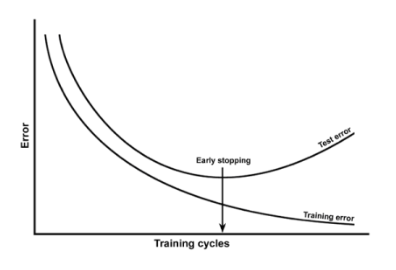
But in a static model like Logistic regresion what you can do its to play with hyperparameters to increase the performance of your model [more details](https://stats.stackexchange.com/questions/355774/how-to-know-if-model-is-overfitting-or-underfitting/571258#571258)

In [45]:
for i in range(1, 100):
    if i%10 == 0:
        print(i)

10
20
30
40
50
60
70
80
90


#### Tunning C parameter

In [46]:
def tunning_c_parameter(min_value=0.001, max_value=100):
    """Compare accury with differents values of split"""
    C_value = min_value
    while C_value <= max_value:
        print("\nC value of:", C_value)
        logreg = LogisticRegression(C=C_value, solver='liblinear', random_state=0)
        logreg.fit(X_train, y_train)
        y_pred_test = logreg.predict(X_test)
        print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
        print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))
        C_value = C_value * 10

In [47]:
tunning_c_parameter()


C value of: 0.001
Training set score: 0.8192
Test set score: 0.8201

C value of: 0.01
Training set score: 0.8411
Test set score: 0.8447

C value of: 0.1
Training set score: 0.8461
Test set score: 0.8503

C value of: 1.0
Training set score: 0.8474
Test set score: 0.8500

C value of: 10.0
Training set score: 0.8477
Test set score: 0.8501

C value of: 100.0
Training set score: 0.8475
Test set score: 0.8501


we have found that the perfect hyperparameter for C is 10

#### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
Remember a e
So, we should first check the class distribution in the test set.

In [48]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

In [49]:
#check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


Our model have a accuracy > null accuracy, so its a good model, but Accuracy its not a good metric 
in classification models

A spam classifier model where 99.9% of the emails are not spam, simply setting "no spam" as the default value has an accuracy of 99.9% is it a good model? obviously not.

#### Confusion Matrix, Precision, Recall
A confusion matrix is a tool for summarizing the performance of a classification algorithm.

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**


In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20903  1164]
 [ 3102  3270]]

True Positives(TP) =  20903

True Negatives(TN) =  3270

False Positives(FP) =  1164

False Negatives(FN) =  3102


<AxesSubplot:>

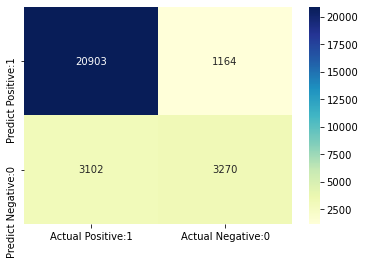

In [52]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Recall(sensitivity) vs Precision

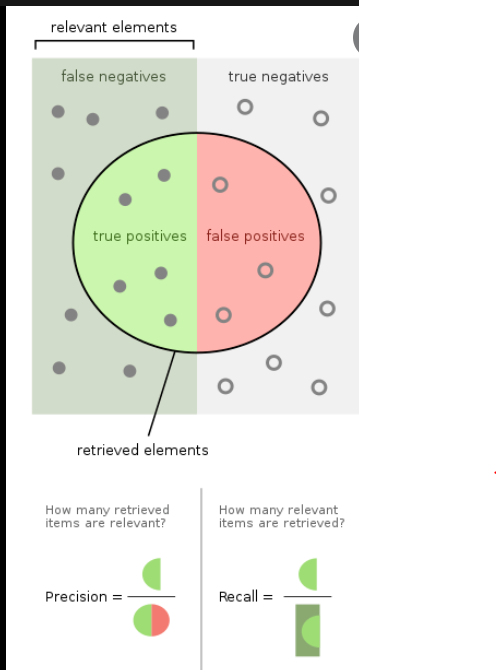
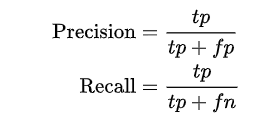

#### When is precision more important over recall and vice versa ?

**Recall**: Having the formula (tp/tp + **fn**)Focus on reduce the FN. "All the guilty in jail and if there is an innocent it is not so important"  

*TP* = gulty in jail  
*TN* = inocent free  
*FP* = inocent in jain  
*FN* = gulty free  --> if we are focus on Recall we have to recude that 

`Example1 Potentional customer`:
       Potential clients register to buy a course. It is important that we do not lose a potential client however               if we call candidates who are not interested it is not important (precision is not important here).
    
    
`Example2 YT blocker`: violent content blocker by YT, for YT it is important that no channel with violent content is published, so it will block in advance any suspect of having violent content in order not to lose any TP, if any creator of violent content turns out to be your content gets blocked by mistake fixing this error is much less costly for the platform than having passed violent content.

**Precision**: "It is preferable to have a guilty man free than to have an innocent man in jail."
   formula  = tp/(tp + **fp**) : use it when fp (false positive) are important (i.e. you DONT want them, or as few as possible).
   
`pregnancy test`: With a pregnancy test, the test manufacturer needs to be sure that a positive result means the woman is really pregnant. People might react to a positive test by suddenly getting married or buying a house (if many consumers got false positives and suffered huge costs for no reason, the test manufacturer would lack customers

#### What its more important in our model Precision or recall ? 

We are trying to predict if it is going to rain, what is more important ?

1) predict that it will rain and we're wrong.  
2) predict that it won't rain and be wrong.  

We belive it is more important to make sure that if it is going to rain, we have predicted it correctly, even if sometimes we have been wrong.This is because preparing for rain, i.e carrying an umbrella and then not getting rained on is less bad than not carrying an umbrella na then suddenly getting rained on and ednding up wet.
that is to say we are interested into reduce the FN = No rain forecast but it is raining.

In [ ]:
#### Adjusting C again based on what we really want its to increase recall

In [ ]:
def tunning_c_parameter_cm(min_value=0.001, max_value=100):
    """Compare accury with differents values of split"""
    C_value = min_value
    while C_value <= max_value:
        print("\nC value of:", C_value)
        logreg = LogisticRegression(C=C_value, solver='liblinear', random_state=0)
        logreg.fit(X_train, y_train)
        y_pred_test = logreg.predict(X_test)

        cm = confusion_matrix(y_test, y_pred_test)
        cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
        
        recall = cm[0,0] / () # tp 7 (tp + fn)
        print("\n Recal:")
        
        C_value = C_value * 10

### Discussion

#### outliers
When to assume that they are du to an error in the data and when to assume that they really represent a one-off event to learn from ?
For example, once a x-months the traffic on our website is multiplied by 10 compared to a normal day, does this represent an "outliers" or its a punctual fact to learn from ? We could cross-reference the data and see if that traffic spike had to do with a special offer(for example)

#### cardinality

getting dummis, when to discard a column that has a very high cardinality ? it  could be that a column with a high cardinaliy could case us to fall into a "curse of dimensionality" problem.

#### Feature Scaling
We should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.(not all the the Ml algoriths use the Feature Scaling )

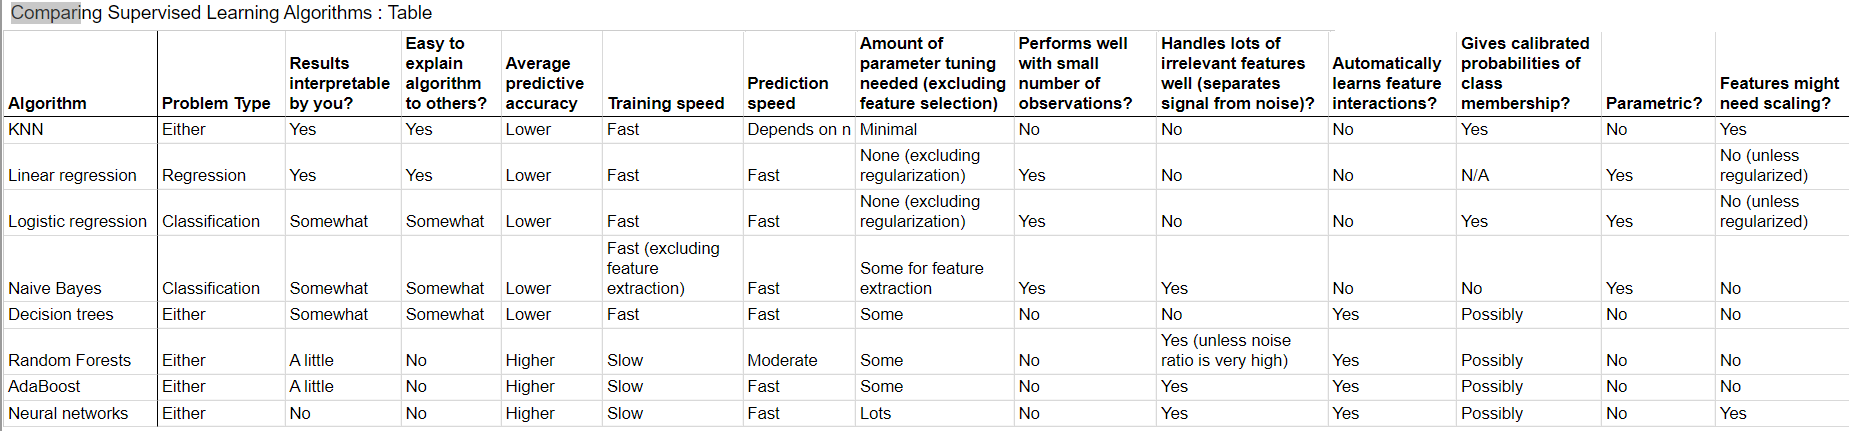

#### Underfitting vs Overfitting
Similar results in Test and Training are signal of underfitting  
Big differences between Test and Traing are signal of overfitting

where is the middle pint? 